In [1]:
import os
os.chdir('../..')

In [2]:
from classes.matching import Matching
from classes.helpers import *
import numpy as np
import json
import pandas as pd
from datetime import datetime
import gzip
import ast

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

colors = {'ba': (232/255,164/255,29/255), 'rb': (0/255,152/255,205/255)}
labels = {'ba': 'BeerAdvocate', 'rb': 'RateBeer'}

data_folder = '../data/'
save_folder = '../figures/all/1-data_analysis/'

In [3]:
ratings_year = {'ba': {}, 'rb': {}}

for key in ratings_year.keys():
    print('Parsing {} reviews.'.format(key.upper()))
    
    gen = parse(data_folder + key + '/ratings.txt.gz'.format(key))
    
    for item in gen:
        
        date = int(item['date'])
        year = datetime.fromtimestamp(date).year
                        
        if year not in ratings_year[key].keys():
            ratings_year[key][year] = []

        ratings_year[key][year].append(float(item['rating']))

Parsing BA reviews.
Parsing RB reviews.


# Nbr ratings per year

In [4]:
years = list(range(2001, 2018))

nbrs = {}
for key in ratings_year:
    nbrs[key] = []
    for y in years:
        nbrs[key].append(len(ratings_year[key][y]))

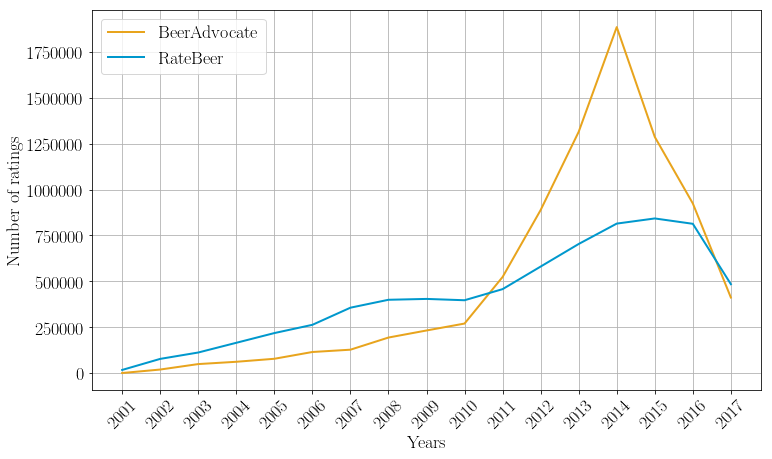

In [7]:
plt.figure(figsize=(12,7))
plt.rc('font', family='libertine')
plt.rc('font', size=18)

for key in nbrs.keys():
    plt.plot(nbrs[key], color=colors[key], label=labels[key], linewidth=2)
    
plt.xticks(list(range(len(years))), years, rotation=45)
plt.legend()

plt.xlabel('Years')
plt.ylabel('Number of ratings')
plt.grid()
plt.savefig(save_folder + 'nbr_ratings_per_year.pdf', bbox_inches='tight')

# Average rating

In [4]:
years = list(range(2001, 2018))

nbr_draws = 1000

avg = {}
for key in ratings_year:
    avg[key] = {'mean': [], 'low': [], 'high': []}
    for y in years:
        vals = np.array(ratings_year[key][y])
           
        tmp = []
        
        for i in range(nbr_draws):
            indices = np.random.randint(0, len(vals), len(vals))
            
            vals_tmp = vals[indices]
            tmp.append(np.mean(vals_tmp))
            
        avg[key]['mean'].append(np.mean(tmp))
        avg[key]['low'].append(np.percentile(tmp, 2.5))
        avg[key]['high'].append(np.percentile(tmp, 97.5))

In [5]:
with open(data_folder + 'plot/avg_year.json', 'w') as outfile:
    json.dump(avg, outfile)

In [10]:
shift = {'ba': -0.0, 'rb': 0.0}
ax = np.array(range(len(years)))

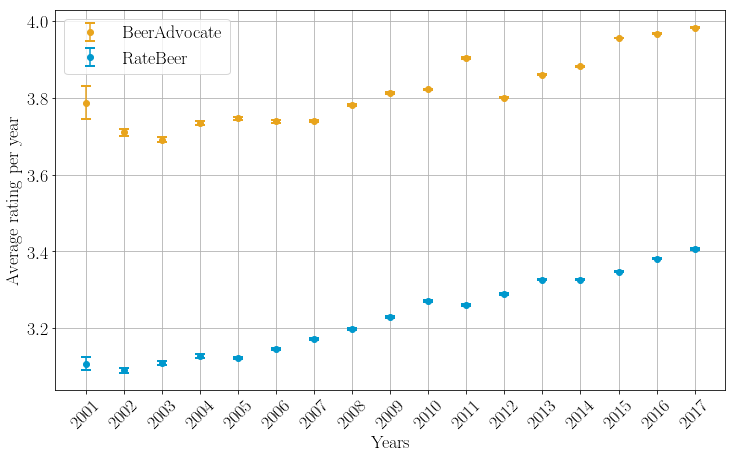

In [11]:
plt.figure(figsize=(12, 7))
plt.grid()

plt.rc('font', family='libertine')
plt.rc('font', size=18)

for key in avg.keys():
    vals = np.array(avg[key]['mean'])
    high = np.array(avg[key]['high'])
    low = np.array(avg[key]['low'])
    conf_int = np.array([high-vals, vals-low])
    plt.errorbar(ax+shift[key], vals , yerr=conf_int,
                 color=colors[key], fmt='o', label=labels[key],
                 capsize=5, capthick=2)
    
plt.legend()
plt.xticks(list(range(len(years))), years, rotation=45)
plt.xlabel('Years')
plt.ylabel('Average rating per year')
plt.savefig(save_folder + 'avg_rating_per_year.pdf', bbox_inches='tight')

# STD

In [6]:
years = list(range(2001, 2018))

nbr_draws = 1000

std = {}
for key in ratings_year:
    std[key] = {'mean': [], 'low': [], 'high': []}
    for y in years:
        vals = np.array(ratings_year[key][y])
           
        tmp = []
        
        for i in range(nbr_draws):
            indices = np.random.randint(0, len(vals), len(vals))
            
            vals_tmp = vals[indices]
            tmp.append(np.std(vals_tmp))
            
        std[key]['mean'].append(np.mean(tmp))
        std[key]['low'].append(np.percentile(tmp, 2.5))
        std[key]['high'].append(np.percentile(tmp, 97.5))

In [8]:
with open(data_folder + 'plot/std_year.json', 'w') as outfile:
    json.dump(std, outfile)

In [13]:
shift = {'ba': -0.0, 'rb': 0.0}
ax = np.array(range(len(years)))

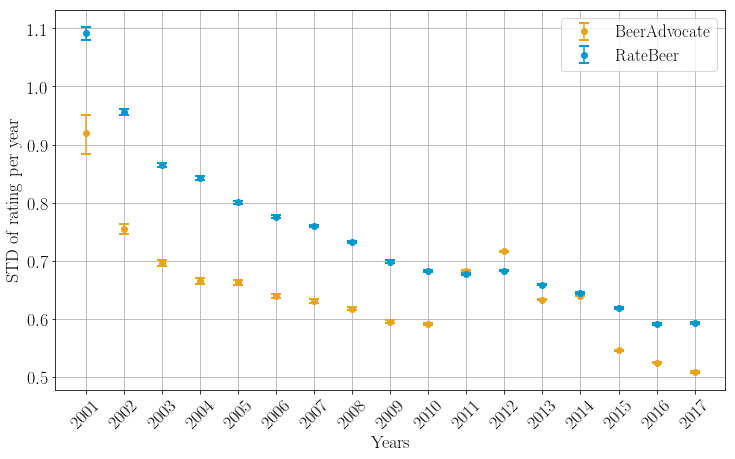

In [14]:
plt.figure(figsize=(12, 7))
plt.grid()

plt.rc('font', family='serif')
plt.rc('font', size=17)

for key in std.keys():
    vals = np.array(std[key]['mean'])
    high = np.array(std[key]['high'])
    low = np.array(std[key]['low'])
    conf_int = np.array([high-vals, vals-low])
    plt.errorbar(ax+shift[key], vals , yerr=conf_int,
                 color=colors[key], fmt='o', label=labels[key],
                 capsize=5, capthick=2)
    
plt.legend()
plt.xticks(list(range(len(years))), years, rotation=45)
plt.xlabel('Years')
plt.ylabel('STD of rating per year')
plt.savefig(save_folder + 'std_rating_per_year.pdf', bbox_inches='tight')